# Individual Assignment - Classification

**----- Import all libraries here -----**

In [76]:
# data manipulation
import pandas as pd
import numpy as np

# visualiation
import seaborn as sb
import matplotlib.pyplot as plt

# model training
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

#metrics
from imblearn.over_sampling import SMOTE

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Data Analysis 

<span style="color:blue">Load the CSV file into a *DataFrame* object named **pima** using Pandas to examine the dataset and perform data cleaning:</span>
    
<span style="color:blue">1) Print the dtype of each column to review the data types of the attributes in the dataset. *(2 points)*</span>

In [3]:
# --- Your code here ---

# load the data
pima = pd.read_csv('diabetes.csv')

# print
print(pima.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure               float64
SkinThickness               float64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


<span style="color:blue">2) Are there any missing values in the dataset? Print out the total count of missing values for the attributes in the dataset. How would you handle the missing values without deleting any record? Develop and execute an operation for that purpose accordingly. *(3 points)*</span>

In [4]:
# --- Your code here ---

# print the number of missing values in each column
print("The number of missing values in each column:" + "\n" + str(pima.isnull().sum()))
# print the total number of missing values
print("The total number of missing values: "+ str(pima.isnull().sum().sum()))

# Fill of missing values with the KNN method
imputer = KNNImputer(n_neighbors=3)
pima = pd.DataFrame(imputer.fit_transform(pima),columns = pima.columns)

print("\n")
# print the number of missing values in each column
print("After filling, the number of missing values in each column:" + "\n" + str(pima.isnull().sum()))
# print the total number of missing values
print("After filling, the total number of missing values: "+ str(pima.isnull().sum().sum()))

The number of missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               1
SkinThickness               1
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         0
Outcome                     0
dtype: int64
The total number of missing values: 3


After filling, the number of missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
After filling, the total number of missing values: 0


<span style="color:blue">--- Your answer here ---</span>

数据集中存在缺失值。缺失值总数为3。
处理缺失值的方法：首先通过`pima.isnull().sum()`检查数据集中每列的缺失值数量，发现存在缺失值。为了处理这些缺失值而不删除任何记录，采用KNN算法进行填充。具体而言，是创建一个`KNNImputer`实例，并设置`n_neighbors=3`，表示在填充缺失值时考虑3个最近邻的样本。填充完成后，使用`fit_transform`方法将缺失值替换为相应的邻居值的平均值。最后，再次打印每列的缺失值数量，确认所有缺失值已被成功填充，确保数据集的完整性。

<span style="color:black"> </span>

<span style="color:blue">3) Examine Outcome by generating a bar plot showing the count of “0” and “1” in Outcome. Write down any of your insights from observing the bar plot. *(3 points)*</span>

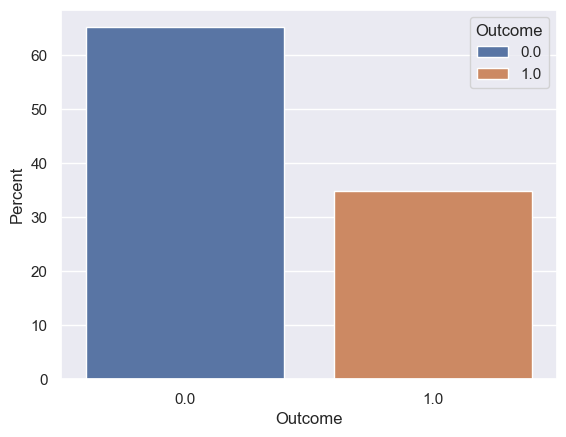

In [5]:
# --- Your code here ---
#sb.set(style=“dargrid”)
#df1=sb.melt(pima)

sb.set(style="darkgrid")
df1=pd.melt(pima)

barplot = sb.barplot(x="Outcome", y="Outcome", data=pima, estimator=lambda x: len(x) / len(pima) * 100, hue="Outcome") 
barplot.set(ylabel="Percent")
plt.show()


<span style="color:blue">--- Your answer here ---</span>

从条形图中可以看出，数据集中患糖尿病的人数少于未患糖尿病的人数。这意味着数据集存在偏斜。一些机器学习算法可能在处理偏斜数据时效果不佳，这种类别不平衡可能影响模型的训练效果，使其倾向于预测数量较多的类别。因此，需要在训练模型之前对数据集进行平衡，以确保模型能够有效识别和预测两类样本。
<span style="color:black"> </span>

<span style="color:blue">4) Generate a pairwise relationship scatterplot (8x8 subplots) using __sb.pairplot(pima, vars=feature_column_names, hue='Outcome')__. *(2 points)*</span>

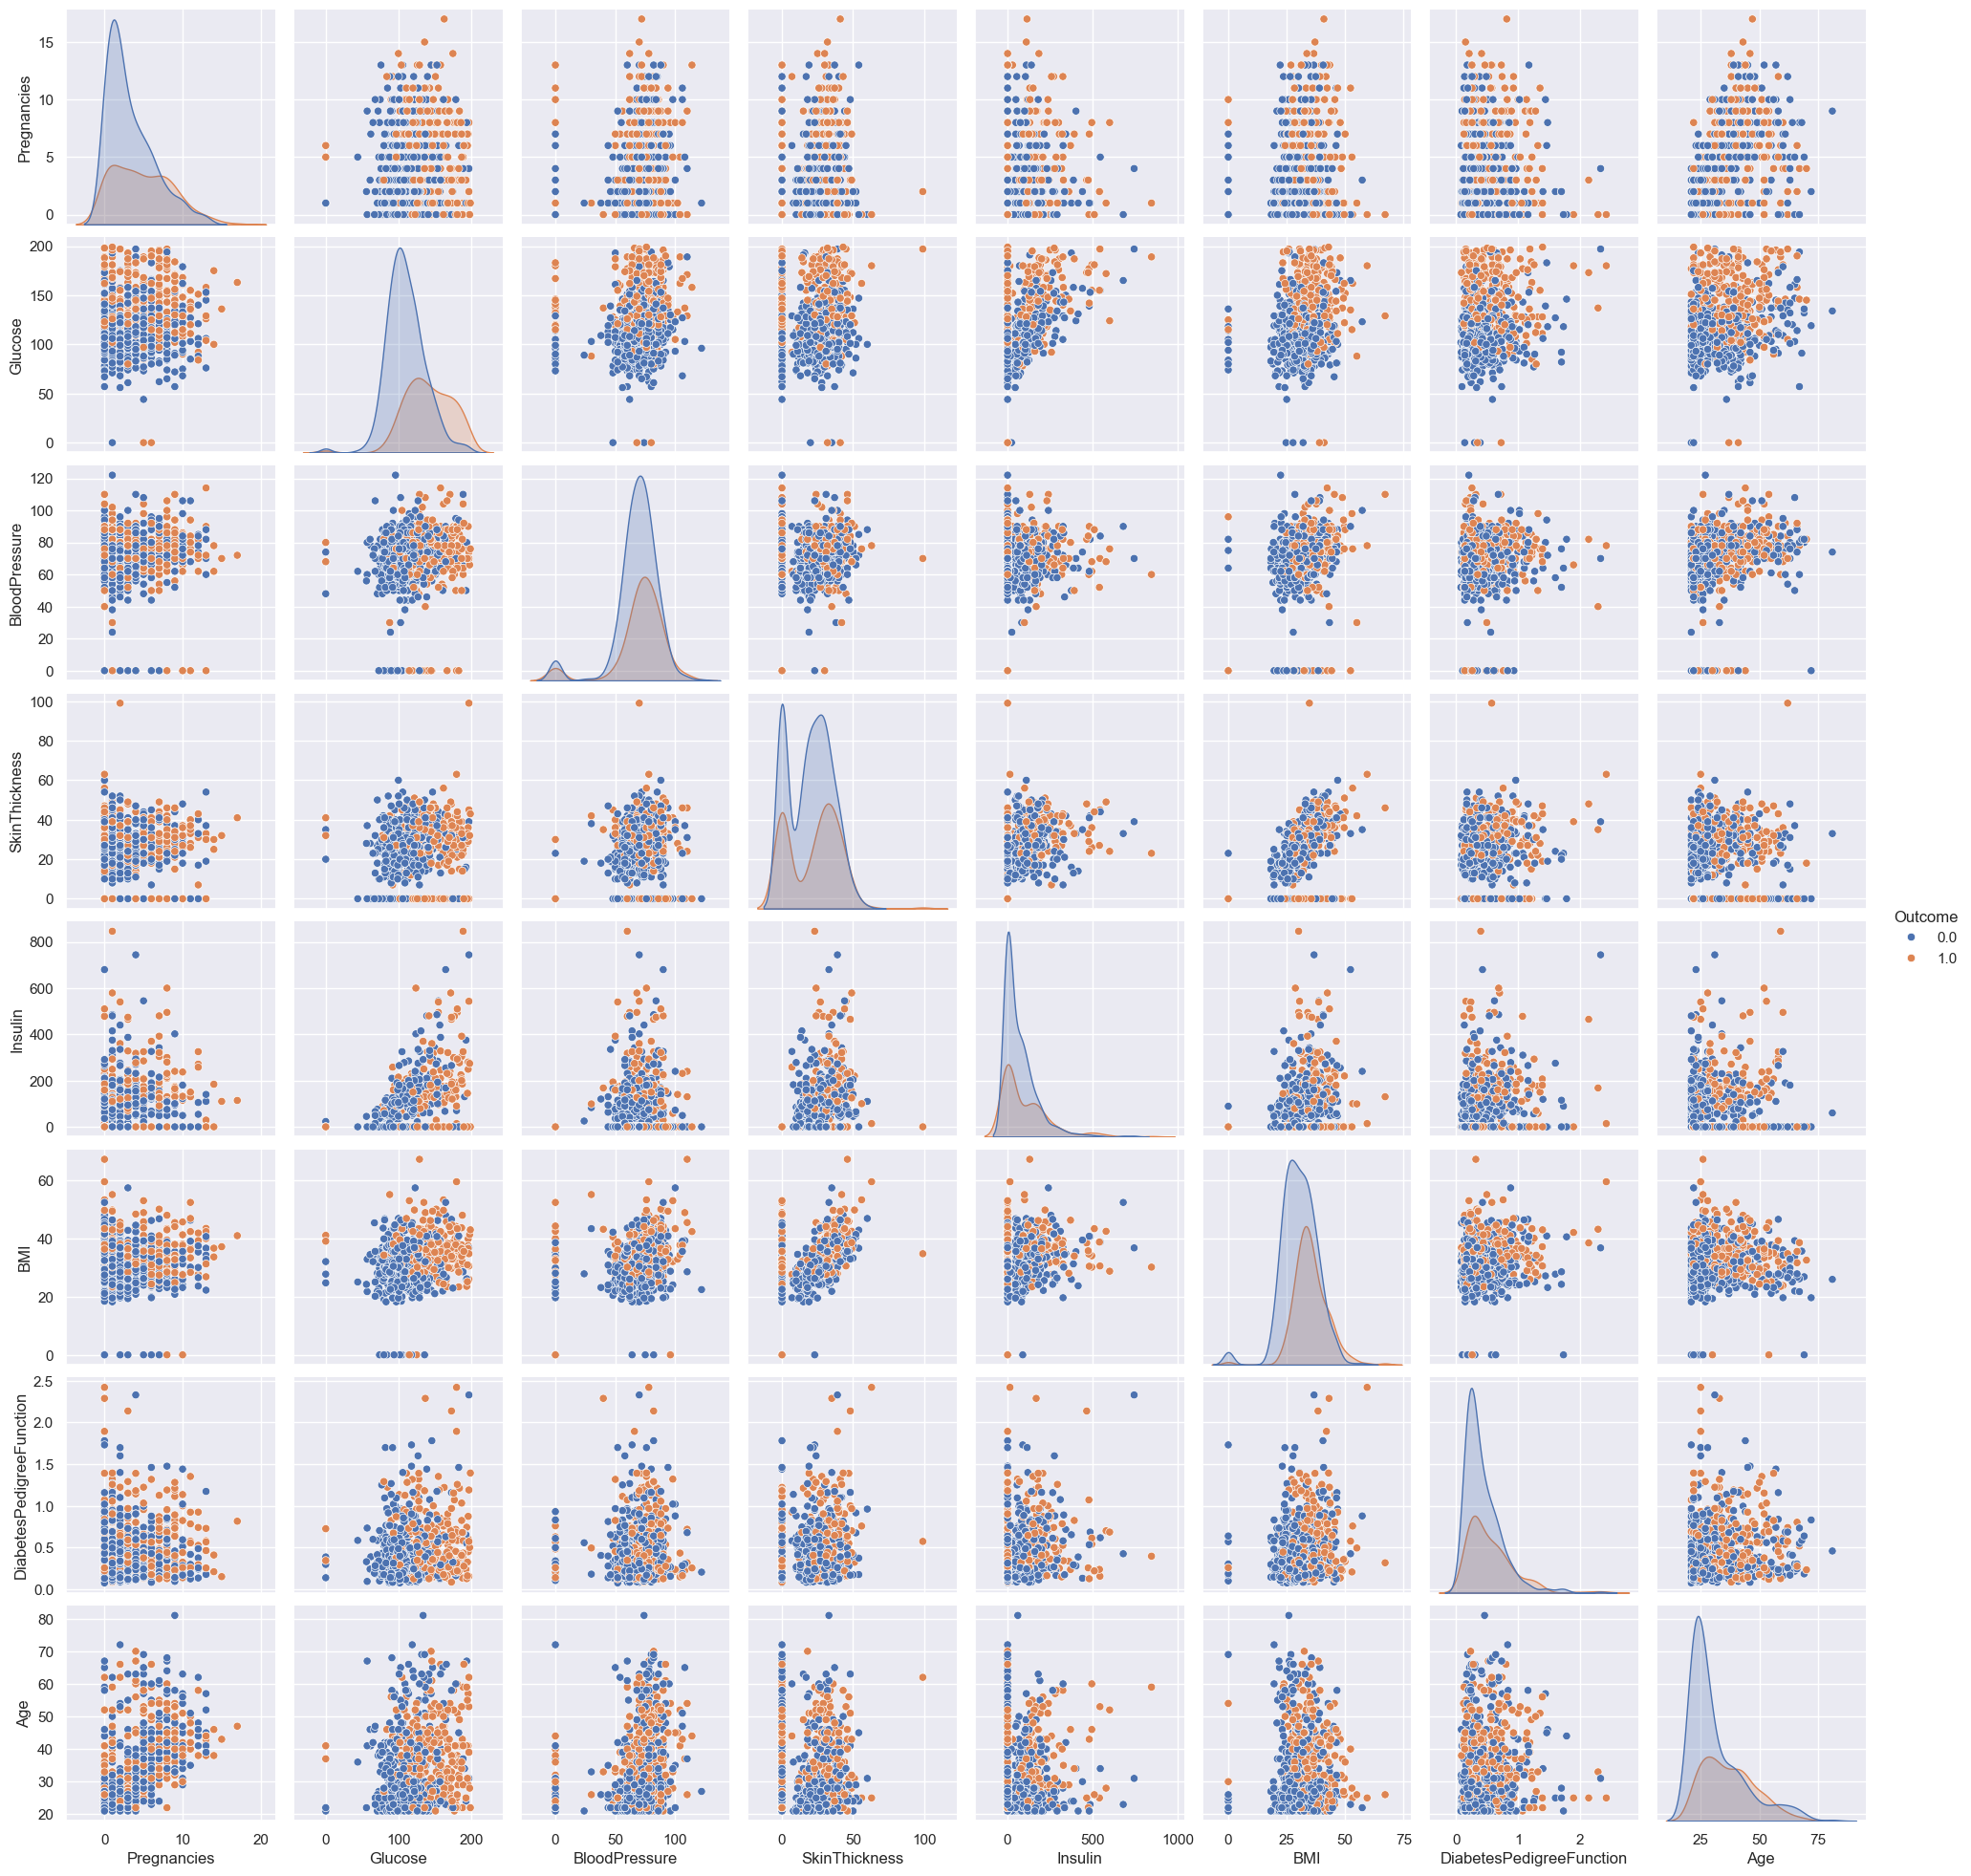

In [6]:
# --- Your code here ---

# 特征列的名称存储在 feature_columns 列表中
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# 生成成对关系散点图
sb.pairplot(pima, vars=feature_columns, hue='Outcome')

# 显示图形
plt.show()

<span style="color:blue">5) Generate a 9x9 heatmap plot showing the co-variance between any two features (including target). *(2 points)*<br/>
    
<span style="color:blue">_(Hint: use __sb.clustermap(pima.corr(), annot=True)__ to plot co-variance heatmap.)_</span>

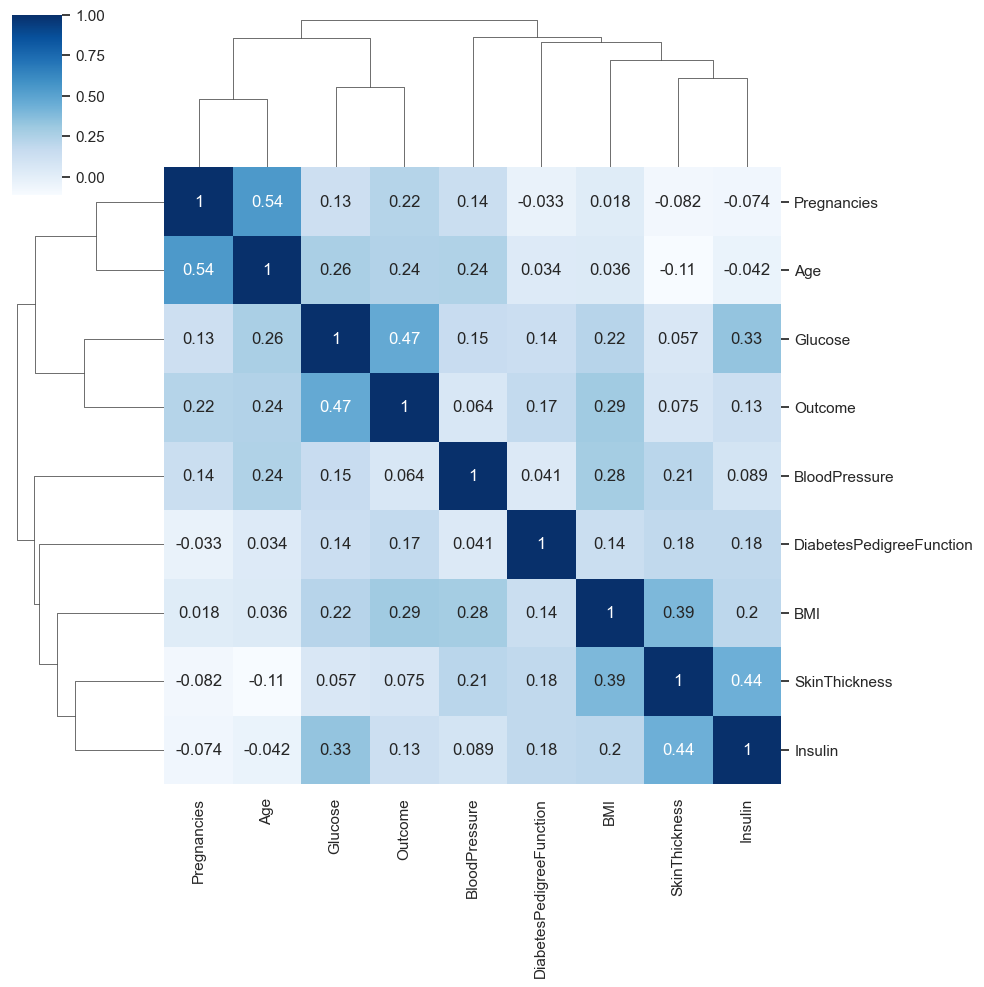

In [7]:
# --- Your code here ---
sb.clustermap(pima.corr(), annot=True, cmap = 'Blues')
plt.show()

<span style="color:blue">6) What are the insights you gained from the two plots generated from 4) and 5)? *(3 points)*</span>

<span style="color:blue">_(Hint: think about how to perform feature selection based on the observations, which may be helpful for constructing your best model in Section 4.)_</span>

<span style="color:blue">--- Your answer here ---</span>

从这两个图中可以看出，`Glucose`、`BMI` 和 `Age` 与糖尿病的`Outcome`之间存在明显的正相关关系，表明它们是重要的预测变量。成对关系散点图显示，这些特征在不同类别之间的分布差异显著，即Glucose、BMI 和 Age 的散点在不同类别（患病与未患病）之间的分布差异明显。而协方差热图则进一步确认了`Glucose`、`BMI`、`Age`与`Outcome`的较高相关性。相对而言，`SkinThickness` 和 `BloodPressure` 等指标的相关性较低，可能在模型中贡献有限，因此在特征选择时可以考虑剔除。综上所述，构建预测糖尿病的模型时，应优先关注 `Glucose`、`BMI` 和 `Age` 等特征，以提高模型的性能。
<span style="color:black"> </span>

# 2. Feature Transformation

We observe that all the variables in the dataset except the target variable *Outcome* are continuous. In this section, you will perform feature transformation on the continuous variables to generate two sets of features that will be used in the subsequent classification task.

**Feature set 1 - Continuous to Categorical**

<span style="color:blue">1) Often when dealing with continuous variables like *BMI* or *BloodPressure*,  we may wish  to transform these continuous variables into categorical variables, which may be better predictors of *Outcome*. This transformation can be achieved as follows: cut the continuous values of each feature into non-overlapping buckets.  Perform this operation on all 8 continuous variables.  You are to devise you own method to cut the continuous values into buckets. Name the resulting DataFrame as __pima1__. pima1 should still contains 9 conlumns with the same set of column names as pima. Use **pima1.head()** to show the top rows. *(5 points)*</span>
    
<span style="color:blue">*(Hint: you can use **pandas.cut()** or **pandas.qcut()** to convert continuous feature to categorical feature. e.g. For Glucose, if you wish to adopt the glucose level guidelines given by American Diabetes Association, you can convert its values into 3 groups:<br/>*
*- Normal > 140mg/dl of glucose,<br/>*
*- Prediabete 140-199mg/dl of glucose,<br/>*
*- Diabetes > 200mg/dl of glucose<br/>*
*using  **pd.cut(pima[’Glucose’],[50,139.99,199.99,250], labels=[0, 1, 2])**. Or you can use **pd.qcut(pima[’Glucose’],4, labels=[0,1,2,3])** to cut the values according to quantile-based discretization function.)*
</span>

In [8]:
# --- Your code here ---
pima1 = pima.copy()

bins = [0, 139.99, 199.99, 250]
labels = [0, 1, 2]
pima1['Glucose'] = pd.cut(pima['Glucose'], bins=bins, labels=labels)

bins = [0, 18.5, 24.9, 29.9, 40, 60] 
labels = [0, 1, 2, 3, 4] 
pima1['BMI'] = pd.cut(pima['BMI'], bins=bins, labels=labels)

pima1['BloodPressure'] = pd.qcut(pima['BloodPressure'], 4, labels=[0, 1, 2, 3])

pima1['SkinThickness'] = pd.qcut(pima['SkinThickness'], 3, labels=[0, 1, 2]) 

bins = [-1, 2, 25, 100, 200] 
labels = [0, 1, 2, 3]
pima1['Insulin'] = pd.cut(pima['Insulin'], bins=bins, labels=labels)

pima1['DiabetesPedigreeFunction'] = pd.qcut(pima['DiabetesPedigreeFunction'], 4, labels=[0, 1, 2, 3])  

pima1['Age'] = pd.qcut(pima['Age'], 4, labels=[0, 1, 2, 3]) 

pima1['Pregnancies'] = pd.qcut(pima['Pregnancies'], 4, labels=[0, 1, 2, 3]) 


print(pima1.head()) 

  Pregnancies Glucose BloodPressure SkinThickness Insulin BMI  \
0           2       1             1             2       0   3   
1           0       0             1             1       0   2   
2           3       1             1             0       0   1   
3           0       0             1             1       2   2   
4           0       0             0             2       3   4   

  DiabetesPedigreeFunction Age  Outcome  
0                        3   3      1.0  
1                        1   2      0.0  
2                        3   2      1.0  
3                        0   0      0.0  
4                        3   2      1.0  


<span style="color:blue">2) Next, we convert the generated categorical features into binary features using the **one-hot encoding scheme**. Assume the continuous feature has m numerical labels. The one-hot encoding scheme will results in a vector of size m with only one of the values as 1 (indicating it as active). Use **pima1.head()** to show the top rows of the encoded pima1. *(2 points)*</span>

<span style="color:blue">*(Hint: you can use **pd.getdummies()** to convert each categorical feature in pima1 into multiple binary features.)*</span>

In [9]:
# --- Your code here ---
pima1 = pd.get_dummies(pima1, drop_first=True)

# print the top rows of the dataframe
print(pima1.head())

   Outcome  Pregnancies_1  Pregnancies_2  Pregnancies_3  Glucose_1  Glucose_2  \
0      1.0          False           True          False       True      False   
1      0.0          False          False          False      False      False   
2      1.0          False          False           True       True      False   
3      0.0          False          False          False      False      False   
4      1.0          False          False          False      False      False   

   BloodPressure_1  BloodPressure_2  BloodPressure_3  SkinThickness_1  ...  \
0             True            False            False            False  ...   
1             True            False            False             True  ...   
2             True            False            False            False  ...   
3             True            False            False             True  ...   
4            False            False            False            False  ...   

   BMI_1  BMI_2  BMI_3  BMI_4  DiabetesPedig

<span style="color:blue">3) Discuss whether the use of one-hot encoding can be omitted and why? *(3 points)*</span>

<span style="color:blue">--- Your answer here ---</span>

独热编码的使用不能省略。以血糖值为例，虽然血糖值的分类结果本身是有序的，类别数值越大表示血糖水平越高，但在某些机器学习应用中，血糖值可能被视为离散的类别，没有实际的顺序，尤其是在将其分为不同的健康状态（如正常、前驱糖尿病和糖尿病）时。在这种情况下，使用独热编码可以帮助模型更好地理解这些离散类别，而不是将其视为连续数值。对于某些机器学习算法（如线性模型），如果直接使用类别的数值，可能会误解这些值之间的关系。因此，尽管血糖值具有顺序性，在特定上下文中，将其视为离散的类别并使用独热编码，可以提高模型的表现和准确性。
<span style="color:black"> </span>

**Feature set 2 - Features normalization**

<span style="color:blue">4) For the second feature set, we normalize the values of 8 continuous variables. For each variable, we apply the transformation using the formula **z=(x−u)/s**, where u and s are the mean and standard deviation of the variable values. Name the resulting DataFrame as **pima2**, and show the top rows using pima2.head(). *(2 points)*</span>

<span style="color:blue">*(Hint: you can use **StandardScaler** from scikit-learn for standadization purpose)*</span>

In [10]:
# --- Your code here ---
pima2 = pima.copy()


features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
            'BMI', 'DiabetesPedigreeFunction', 'Age']


scaler = StandardScaler()


pima2[features] = scaler.fit_transform(pima2[features])


print(pima2.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.148728       0.907228 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.161521       0.530866 -0.692891 -0.684422   
2     1.233880  1.943724      -0.264937      -1.288218 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.161521       0.154503  0.123302 -0.494043   
4    -1.141852  0.504055      -1.505932       0.907228  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.469017  1.425995      1.0  
1                 -0.364719 -0.190672      0.0  
2                  0.604952 -0.105584      1.0  
3                 -0.920543 -1.041549      0.0  
4                  5.486538 -0.020496      1.0  


<span style="color:blue">5) Briefly discuss whether Feature set 1 or Feature set 2 is more useful for training classification models and why? Also comment on whether feature normalization is necessary in this case. *(3 points)*</span>

<span style="color:blue">--- Your answer here ---</span>

特征集2对于训练分类模型更有用，因为它通过标准化处理消除了不同特征之间的尺度差异，使得模型能够更快收敛并提高性能。并且有助于确保变量处于相似的尺度上，从而防止某些变量主导模型的学习过程。特征集1将连续变量转换为分类变量，虽然可以帮助模型捕捉非线性关系，但可能会导致信息损失，尤其是在特征的细微变化对分类结果有影响时。特征归一化在特征集2中是必要的，特别是对于基于距离的模型和线性模型，因为它确保了每个特征对模型的影响是均衡的，避免了某些特征因数值范围较大而主导模型学习的情况。因此，特征集2更适合用于训练分类模型。

在这种情况下需要特征归一化。因为该数据集的特征种类很多，并且不同变量的数值范围差异较大，如果不进行归一化处理，可能会导致某些特征对模型的影响过大，影响模型的性能。特征归一化可以确保每个特征处于相同的尺度，对模型的影响是均衡的，避免了某些特征因数值范围较大而主导模型学习的情况，提高模型的稳定性和收敛性。
<span style="color:black"> </span>

# 3. Model Construction

Your task in this section is to use the derived feature sets from previous section to construct classification models for diabetes outcome prediction (0 or 1).  We have splitted the data into training and test sets for you as shown below (you need to run the cell below).

In [11]:
# pima1 split
# Feature set 1
x1 = pima1.drop(columns='Outcome')
y1 = pima1['Outcome']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.25, random_state=0)

# pima2 split
# Feature set 2
x2 = pima2.drop(columns='Outcome')
y2 = pima2['Outcome']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.25, random_state=0)

print(x1.shape, y1.shape)
print(x2.shape, y2.shape)

(768, 23) (768,)
(768, 8) (768,)


<span style="color:blue">1) Experiment with the 5 classification models below from scikit-learn with their default hyperparameter settings on pima1 and pima2 (You should thus perform 5x2 times model training and evaluation):<br/></span>

<span style="color:blue">- Gaussian naive bayes</span><br/>
<span style="color:blue">- KNN</span><br/>
<span style="color:blue">- SVM</span><br/>
<span style="color:blue">- logistic regression</span><br/>
<span style="color:blue">- decision tree<br/></span>
    
<span style="color:blue">You should perform model training on x_train1 and x_train2,  and perform evaluation on x_test1 and x_test2 respectively.  Use **accuracy** and **weighted F1** as evaluation metrics, and save the results of different models in the defined lists **pima1_acc**, **pima2_acc**, **pima1_f1**, **pima2_f1**. Note that the order of results in each list should match the model order provided in **model_names**. Print the **accuracy_record** table and **F1_record** table using the provided code. *(20 points)*</span>

In [12]:
model_names = ['Gaussian NB', 'KNN', 'SVM', 'LR', 'DT']
pima1_acc = []
pima2_acc = []
pima1_f1 = []
pima2_f1 = []

# --- Your code here ---
models = [GaussianNB(), KNeighborsClassifier(), SVC(), LogisticRegression(), DecisionTreeClassifier()]

for model in models:
    model.fit(x_train1, y_train1)
    y_pred1 = model.predict(x_test1)
    model.fit(x_train2, y_train2)
    y_pred2 = model.predict(x_test2)
    pima1_acc.append(accuracy_score(y_test1, y_pred1))
    pima2_acc.append(accuracy_score(y_test2, y_pred2))
    pima1_f1.append(f1_score(y_test1, y_pred1, average='weighted'))
    pima2_f1.append(f1_score(y_test2, y_pred2, average='weighted'))

# calculate the average accuracy and F1 score
pima1_acc.append(np.mean(pima1_acc))
pima2_acc.append(np.mean(pima2_acc))
pima1_f1.append(np.mean(pima1_f1))
pima2_f1.append(np.mean(pima2_f1))
model_names.append('Average')

# print the accuracy records & the avarage table using pandas DataFrame
print("Accuracy record tables:")
print("Feature set 1:")
print(pd.DataFrame({'Model': model_names, 'Accuracy': pima1_acc, 'F1': pima1_f1}))
print("Feature set 2:")
print(pd.DataFrame({'Model': model_names, 'Accuracy': pima2_acc, 'F1': pima2_f1}))


Accuracy record tables:
Feature set 1:
         Model  Accuracy        F1
0  Gaussian NB  0.703125  0.712746
1          KNN  0.692708  0.682030
2          SVM  0.776042  0.763405
3           LR  0.786458  0.781675
4           DT  0.703125  0.702487
5      Average  0.732292  0.728469
Feature set 2:
         Model  Accuracy        F1
0  Gaussian NB  0.765625  0.757481
1          KNN  0.812500  0.808833
2          SVM  0.776042  0.765123
3           LR  0.802083  0.794545
4           DT  0.718750  0.721919
5      Average  0.775000  0.769580


<span style="color:blue">2) According to the results above, which feature set is better, pima1 or pima2? Select one to be used in the following tasks. *(2 points)*</span>

<span style="color:blue">--- Your answer ---</span>

特征集2更好，因为它具有更高的准确率和F1分数。所以我将会在以下任务中使用特征集2。
<span style="color:black"> </span>

<span style="color:blue">3) Select one classification model from 1). Discuss which are the hyperparameters that may affect the model performance the most. Perform grid search with 10 folds cross-validation for tuning those hyperparameters on the training set of either pima1 or pima2 (according to your choice in 2)), using accuracy as the scoring metric. Print the configuration of the best selected model and its prediction **accuracy** and **weighted F1** scores on the corresponding test set. *(15 points)*</span>

<span style="color:blue">*(Hint: for each selected hyperparameter, you need to prepare a list of reasonable values for tunining. Use **sklearn.model_selection.GridSearchCV** for grid search.)*</span>

<span style="color:blue">--- Your choice of hyperparameters here ---</span>

对于逻辑回归模型，我使用 `GridSearchCV` 函数来寻找最佳超参数。可能对模型性能影响最大的超参数是 `C` 和 `penalty`。`C` 参数控制正则化强度，而 `penalty` 参数指定用于惩罚的范数。没有选择`solver`和`max_iter`的原因是它们的默认值通常已经足够有效。我使用以下值进行调优：`C: [0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]`，`penalty: [l1, l2]`。
<span style="color:black"> </span>

In [13]:
# --- Your code here ---


# # 使用pima2数据集
# x_train_selected = x_train2
# y_train_selected = y_train2
# x_test_selected = x_test2
# y_test_selected = y_test2

# # 定义KNN模型
# knn_model = KNeighborsClassifier()

# # 定义需要调优的超参数空间
# param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# # 创建GridSearchCV对象
# grid_search = GridSearchCV(knn_model, param_grid, scoring='accuracy', cv=10)

# # 在训练集上进行网格搜索
# grid_search.fit(x_train2, y_train2)

# # 打印最佳参数配置
# print("The best configuration is: ", grid_search.best_params_)

# # 在测试集上进行预测
# y_pred2 = grid_search.predict(x_test2)

# # 计算最佳模型的性能指标
# accuracy = accuracy_score(y_test2, y_pred2)
# f1 = f1_score(y_test2, y_pred2, average='weighted')

# # 打印性能指标
# print("The accuracy of the best model is: ", accuracy)
# print("The weighted F1 score of the best model is: ", f1)

# # 获取混淆矩阵
# conf_matrix = confusion_matrix(y_test_selected, y_pred2)

# # 使用热力图显示混淆矩阵
# sb.heatmap(conf_matrix, annot=True)
# plt.title('Confusion Matrix (After Hyperparameter Tuning)')
# plt.show()

# define the hyperparameter values
param_grid = {'penalty':['l1', 'l2'], 'C':[0.05, 0.1, 0.15, 0.149, 0.2, 0.5, 1, 2, 5, 10]}
# define the grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='accuracy')
# perform the grid search
grid_search.fit(x_train2, y_train2)
# print the best configuration
print("The best configuration is: " + str(grid_search.best_params_))
# print the accuracy and weighted F1 scores of the best model
print("The accuracy of the best model is: " + str(grid_search.best_score_))
print("The weighted F1 score of the best model is: " + str(f1_score(y_test2, grid_search.predict(x_test2), average='weighted')))

The best configuration is: {'C': 0.15, 'penalty': 'l2'}
The accuracy of the best model is: 0.762129461584997
The weighted F1 score of the best model is: 0.794544901570449


<span style="color:blue">4) Besides accuracy and F1 scores, one can look at the confusion matrix to understand the model's prediction behaviour. Compare confusion matrix on test data before and after hyperparameter tuning for the selected model in 3). Discuss any of your observations or insights. *(5 points)*</span>

<span style="color:blue">*(Hint: you can use **confusion_matrix** from scikit-learn, and use **sb.heatmap(conf_matrix, annot=True)** to plot a corresponding heatmap for better visualization.)*</span>

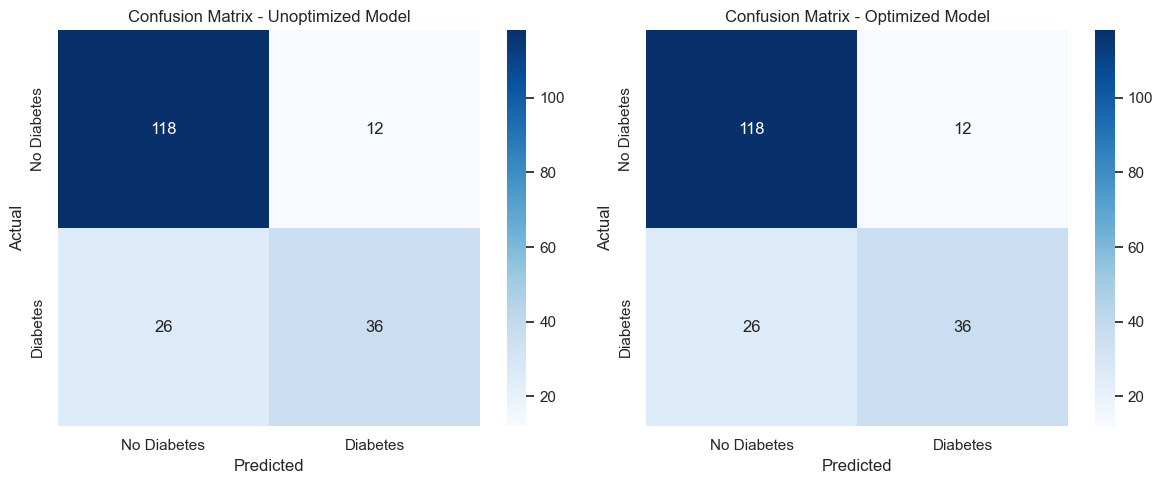

In [14]:
# --- Your code here ---

unoptimized_model = LogisticRegression() 
unoptimized_model.fit(x_train2, y_train2) 

y_pred_unoptimized = unoptimized_model.predict(x_test2) 
y_pred_optimized = grid_search.predict(x_test2)  

# 3. 计算混淆矩阵
conf_matrix_unoptimized = confusion_matrix(y_test2, y_pred_unoptimized)
conf_matrix_optimized = confusion_matrix(y_test2, y_pred_optimized)

# 4. 可视化混淆矩阵
plt.figure(figsize=(12, 5))

# 未调优模型的混淆矩阵
plt.subplot(1, 2, 1)
sb.heatmap(conf_matrix_unoptimized, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Unoptimized Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 调优后的模型的混淆矩阵
plt.subplot(1, 2, 2)
sb.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Optimized Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

## <span style="color:blue">--- Your observations here ---</span>

假阳性的数量为12（假阳性率：12/（12+118）=0.092），而假阴性的数量为26（假阴性率：26/（26+36）=0.419）。就比例而言，假阴性率远高于假阳性率，模型在预测没有糖尿病的样本时表现良好，但在识别糖尿病患者方面仍有改进的空间。这可能是数据集中各类别样本数量不平衡导致的。由前面代码绘制的图表可以看出，没有糖尿病的样本数量远大于有糖尿病的样本数量，几乎为2倍。

在医疗领域，假阴性通常比假阳性更为严重，因为未能及时识别糖尿病患者可能对他们的健康产生重大影响。因此，改进模型以减少假阴性和假阳性的数量是非常重要的，该预测模型仍然有很大的改进空间。

此外，优化前后模型的混淆矩阵完全相同，表示超参数调优未能显著改善模型的预测性能，需要进一步的分析和调整。这也表明，模型调优是一个复杂的过程，需要综合考虑不同方面的指标。

<span style="color:black">  </span>

<span style="color:blue">5) You can get feature importances for some tree-based classifiers in scikit-learn via **clf.feature_importances_**. Example code for plotting pima2 feature importances for an adaboost decision tree classifier has been given below. Generate the plot and describe your observations. Briefly describe how the feature importances for the given classifier can be computed. *(5 points)*</span>

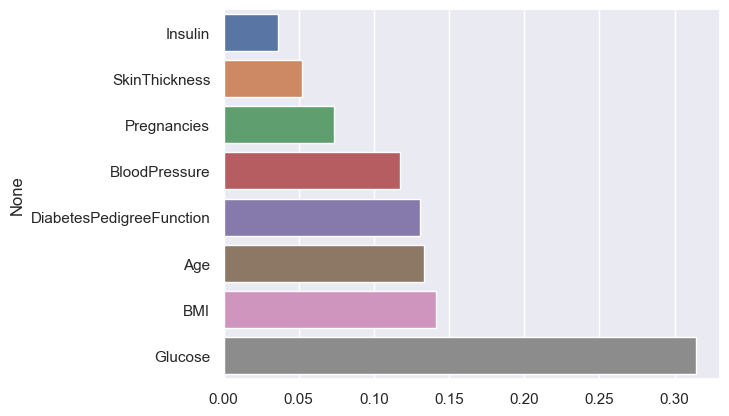

In [15]:
# --- Your code here ---

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(x_train2, y_train2)
# get the feature importances
importances = model.feature_importances_
# get the feature names
feature_names = x_train2.columns
# sort the feature importances
indices = np.argsort(importances)

# Plot feature importances
sb.barplot(x=importances[indices], y=feature_names[indices], hue=feature_names[indices])
plt.show()

# Plot feature importances


<span style="color:blue">--- Your description here ---</span>

从图中可以看出，最重要的特征是`Glucose`，表明血糖水平在预测糖尿病中起着关键作用，其次是 `BMI`、`Age`、`DiabetesPedigreeFunction` 和 `BloodPressure`等，而 `SkinThickness` 和 `Insulin` 的重要性较低，反映出这些特征对模型的贡献较小。

在训练过程中，决策树通过选择特征来分裂节点，以最大程度地减少不纯度（如基尼不纯度或熵）。每次分裂时，模型会评估每个特征对不纯度的贡献。对于每个特征，模型会跟踪该特征在所有节点中用于分裂的次数以及每次分裂所带来的不纯度减少量。所以，特征重要性是通过计算每个特征在树的分裂中对减少不纯度的贡献来确定的，最终结果通过 `clf.feature_importances_` 属性获取，帮助我们理解模型的决策过程。
<span style="color:black"> </span>

<span style="color:blue">6)  Think  about  how  to  compute  the  feature  importances  for  other  classifiers  in  1).   Select  one classifier (except decsion tree), and generate a similar bar plot showing the feature importances. *(8 points)*</span>

In [16]:
# --- Your code here ---

# 特征的重要性可以通过模型的weights来衡量。每个特征的系数表示该特征对预测结果的影响程度。系数的绝对值越大，特征的重要性越高。
model = LogisticRegression()

model.fit(x_train2, y_train2)
# 通过 coef_ 属性可以获取逻辑回归模型中每个特征的系数，这些系数反映了特征对预测结果的影响程度。在二分类问题中，coef_[0]获取的是第一个类别的系数，帮助理解特征在模型决策中的作用。
# 使用 np.abs() 函数获取系数的绝对值，确保特征重要性不受特征方向的影响。
importances = np.abs(model.coef_[0])
feature_names = x_train2.columns
indices = np.argsort(importances)

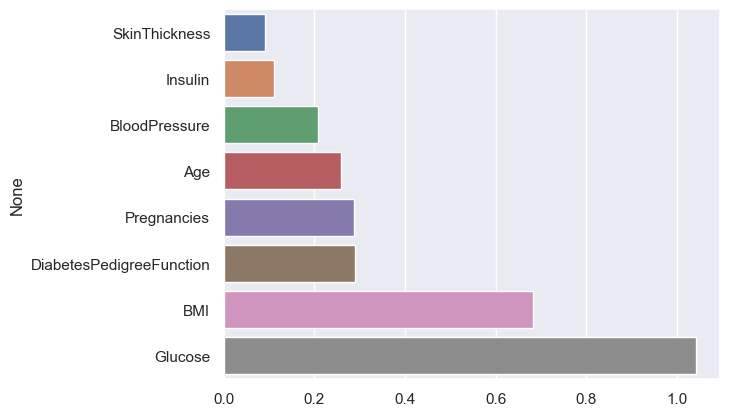

In [17]:
# --- Your code here ---
sb.barplot(x=importances[indices], y=feature_names[indices], hue=feature_names[indices])
plt.show()

# 4. Best Model Construction

<span style="color:blue">1) Generate the best classifier you can for predicting the diabetes outcome. Show the classification **accuracy**, **weighted F1** and **confusion matrix** on test data (you should keep the original train test split). Besides that, you can also show any result or plot that are helpful for us to better understand your model. Write a short description of you model indicating the elements that help to improve prediction. You may use any classifier including but not limited to those experimented above. Marks will be given based on your model performance and description. *(13 points)*</span>

<span style="color:blue">*(Hint: you can think about improving the model performance from different aspects: e.g. improve the feature set; choose a more sophisticated classifier such as ensemble models; or improve the training process via careful hyperparameter tunning or sampling techniques.)*</span>

<span style="color:blue">--- Your description here ---</span>

首先，使用 SMOTE（合成少数类过采样技术）算法对训练数据进行过采样。这将有助于平衡数据集。SMOTE 专门设计用于处理不平衡数据集，通过为少数类生成合成样本来实现。通过减轻偏差并捕捉少数类的重要特征，SMOTE 有助于提高预测的准确性和模型的性能。

<span style="color:black">  </span>

In [18]:
x_train2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

(740, 8) (740,)


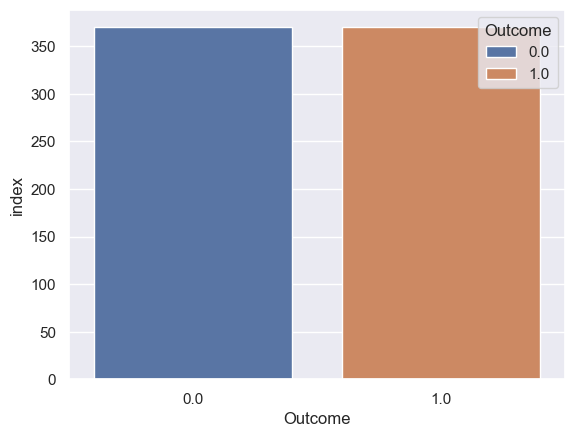

In [19]:
# --- Your code here ---
# over sampling
sm = SMOTE(random_state=0)
x_train2_res, y_train2_res = sm.fit_resample(x_train2, y_train2)
print(x_train2_res.shape, y_train2_res.shape)

# from imblearn.over_sampling import ADASYN

# # 使用 SMOTE 进行过采样
# adasyn = SMOTE(random_state=0)
# x_train2_res, y_train2_res = adasyn.fit_resample(x_train2, y_train2)

# print(x_train2_res.shape, y_train2_res.shape)

# plot the barplot
sb.barplot(data=pd.DataFrame({'Outcome': y_train2_res}).reset_index().groupby('Outcome').count().reset_index(), x='Outcome', y='index', hue='Outcome')
barplot.set(ylabel="Count")
plt.show()

<span style="color:blue">--- Your description here ---</span>

其次，使用XGBoost分类器来训练模型。XGBoost是一个分布式梯度提升库，其针对性能进行了优化。它基于梯度提升决策树算法，该算法将多个弱预测模型（通常为决策树）组合起来构建一个强预测模型。XGBoost具备多项优势，包括用于防止过拟合的正则化、为提高效率而采用的并行处理、对缺失值的自动处理、用于寻找最佳提升轮数的内置交叉验证，以及允许用户自定义优化目标和评估标准的灵活性。XGBoost在许多机器学习竞赛中取得了显著的成功，可用于解决二分类、多分类、回归以及排序等问题。 

此时，模型的预测性能为0.713的ACC和0.718的F1。
<span style="color:black">  </span>

In [104]:
# XGBClassifier
model_XGBClassifier = XGBClassifier()
model_XGBClassifier.fit(x_train2_res, y_train2_res)
print("The accuracy of the XGBClassifier model is: " + str(accuracy_score(y_test2, model_XGBClassifier.predict(x_test2))))
print("The weighted F1 score of the XGBClassifier model is: " + str(f1_score(y_test2, model_XGBClassifier.predict(x_test2), average='weighted')))

# # DT
# model_DT = DecisionTreeClassifier()
# model_DT.fit(x_train2_res, y_train2_res)
# print("The accuracy of the DT model is: " + str(accuracy_score(y_test2, model_DT.predict(x_test2))))
# print("The weighted F1 score of the DT model is: " + str(f1_score(y_test2, model_DT.predict(x_test2), average='weighted')))

The accuracy of the XGBClassifier model is: 0.7135416666666666
The weighted F1 score of the XGBClassifier model is: 0.7188847984530716


<span style="color:blue">--- Your description here ---</span>

接下来，我使用 GridSearchCV 来寻找 SVM 和 DT 分类器的最佳超参数。同时，在这个过程中，对XGBoost模型进行三次训练数据不同的实验，分别是仅使用采样数据、采样+特征选择、仅特征选择。其中，采样是指上文使用SMOTE技术平衡了训练数据之后的数据集。特征选择，是指因为训练数据中大多数特征与糖尿病预测结果相关性不大，影响分类器结果，所以对特征进行选择，挑选其中相关性最大的几个特征来训练分类器，避免其他数据对分类器的干扰。


根据三种实验设置调参之后的对比，发现采样+特征选择+寻找最优参数后的XGBoost分类器性能最佳。测试结果表明，该模型的表现为0.825的ACC和0.778的F1，优于上一节的0.713的ACC和0.718的F1。
<span style="color:black">  </span>

In [113]:
#XGBClassifier
print("\nXGBClassifier:\n")
#XGBClassifier
param_grid_XGBClassifier = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
    'n_estimators': [100, 200, 300, 400, 500]
}
#仅采样
grid_search = GridSearchCV(XGBClassifier(), param_grid_XGBClassifier, cv=10, scoring='accuracy', n_jobs=16)
grid_search.fit(x_train2_res, y_train2_res)
best_model_XGBClassifier = grid_search
best_acc_XGBClassifier = grid_search.best_score_
best_f1_XGBClassifier = f1_score(y_test2, grid_search.predict(x_test2), average='weighted')
print("仅采样：\n")
print("The configuration is: " + str(grid_search.best_params_))
#采样+选择特征
selected_features = ['Glucose', 'Age', 'BMI'] 
x_train2_res_selected = x_train2_res[selected_features]
x_test2_selected = x_test2[selected_features]
grid_search = GridSearchCV(XGBClassifier(), param_grid_XGBClassifier, cv=10, scoring='accuracy', n_jobs=16)
grid_search.fit(x_train2_res_selected, y_train2_res)
if best_acc_XGBClassifier < grid_search.best_score_ :
    best_model_XGBClassifier = grid_search
    best_acc_XGBClassifier = grid_search.best_score_
    best_f1_XGBClassifier = f1_score(y_test2, grid_search.predict(x_test2_selected), average='weighted')
print("\n采样+选择特征：\n")
print("The configuration is: " + str(grid_search.best_params_))
# 仅选择特征
x_train2_selected = x_train2[selected_features]
x_test2_selected = x_test2[selected_features]
grid_search = GridSearchCV(XGBClassifier(), param_grid_XGBClassifier, cv=10, scoring='accuracy', n_jobs=16)
grid_search.fit(x_train2_selected, y_train2)
if best_acc_XGBClassifier < grid_search.best_score_ :
    best_model_XGBClassifier = grid_search
    best_acc_XGBClassifier = grid_search.best_score_
    best_f1_XGBClassifier = f1_score(y_test2, grid_search.predict(x_test2_selected), average='weighted')
print("\n仅选择特征：\n")
print("The configuration is: " + str(grid_search.best_params_))

print("\nXGBClassifier Best：\n")
print("The best configuration of XGBClassifier is: " + str(best_model_XGBClassifier.best_params_))
print("The best accuracy of the model XGBClassifier is: " + str(best_acc_XGBClassifier))
print("The best weighted F1 score of the model XGBClassifier is: " + str(best_f1_XGBClassifier))


XGBClassifier:

仅采样：

The configuration is: {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}

采样+选择特征：

The configuration is: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.7}

仅选择特征：

The configuration is: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.6}

XGBClassifier Best：

The best configuration of XGBClassifier is: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.7}
The best accuracy of the model XGBClassifier is: 0.8256756756756758
The best weighted F1 score of the model XGBClassifier is: 0.7789270484466303


<span style="color:blue">--- Your description here ---</span>

使用最优模型重新对糖尿病患者的测试数据集进行预测，并绘制混淆矩阵。在查看由XGBoost分类器生成的混淆矩阵时，可以发现最优模型的假阳性率和假阴性率均低于默认模型。不过，假阴性比例仍然较高，这可能会引发一些医疗上的不良后果，耽误糖尿病患者的治疗。


<span style="color:black"> </span>

The accuracy of the best XGBClassifier model is: 0.7916666666666666
The weighted F1 score of the best XGBClassifier model is: 0.7916666666666666


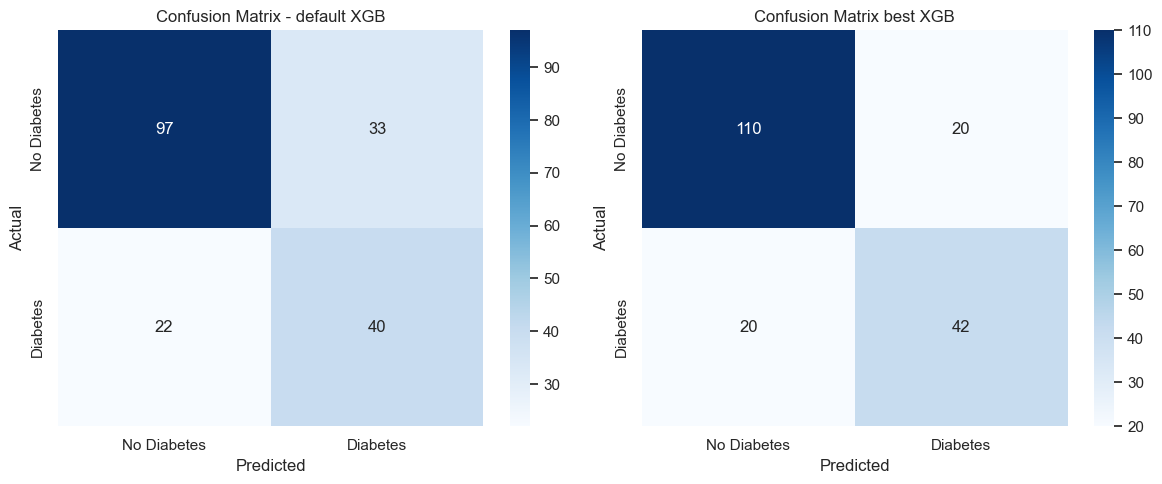

In [121]:
# --- Your code here ---
# best model
Best_Model_XGBClassifier = best_model_XGBClassifier

default = XGBClassifier()
default.fit(x_train2_res, y_train2_res)

print("The accuracy of the best XGBClassifier model is: " + str(accuracy_score(y_test2, Best_Model_XGBClassifier.predict(x_test2))))
print("The weighted F1 score of the best XGBClassifier model is: " + str(f1_score(y_test2, Best_Model_XGBClassifier.predict(x_test2), average='weighted')))

conf_matrix_XGB = confusion_matrix(y_test2, Best_Model_XGBClassifier.predict(x_test2))
conf_matrix_default_XGB = confusion_matrix(y_test2, default.predict(x_test2))


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sb.heatmap(conf_matrix_default_XGB, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - default XGB')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sb.heatmap(conf_matrix_XGB, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix best XGB')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


<span style="color:blue">2) Can the final model you constructed be deployed at the hospital to diagnose patients automatically?  How would the doctors explain the prediction results to the patients?  Write down any of your opinions or concerns. *(2 points)*</span>

<span style="color:blue">--- Your opinion here ---</span>

目前构建的这个糖尿病预测模型并不适合直接在医院部署以自动诊断患者。尽管模型能够对糖尿病情况做出一定的预测，但假阴性率超过了30%，意味着每10个实际患有糖尿病的患者中，大约有3个会被模型误判为未患病，这样高的假阴性率在医疗场景下是存在较大风险的，容易导致患者错过早期诊断和及时干预治疗的最佳时机，进而可能使病情进一步发展恶化。

此外，现实世界比数据集复杂得多，实际的健康状况可能会受到多种因素的影响，全面细致的身体检查和医生丰富的诊断治疗经验是模型无法比拟的。该模型并没有考虑不同地区人群特征差异，缺乏普适性的度量。所以从准确性和对患者负责的角度来看，还达不到能够直接应用于自动诊断的可靠程度。

在医疗场景应用模型时，还需要考虑数据隐私保护等问题。患者的个人健康数据属于敏感信息，如何在利用模型进行训练和分析的过程中保障数据安全不被泄露是非常关键的一点。

如果在某些情况下，医生参考了该模型的预测结果来辅助诊疗，向患者解释结果时需要格外谨慎且保持清晰透明。例如，医生应该告知患者：使用了一个预测模型来辅助了解患糖尿病的可能性情况，结果仅供参考，并不能作为确诊或者排除糖尿病的依据。并提醒即便模型提示患糖尿病的风险较低（或者较高等情况），还是需要结合是否有多饮、多食、多尿、体重减轻等症状表现，以及进一步通过更准确的医学检查手段，比如血糖检测等，来综合判断。模型不能替代传统的专业医学诊断流程和治疗方案。


<span style="color:black"> </span>